<a href="https://colab.research.google.com/github/priyal-shah-portfolio/priyal-shah-portfolio/blob/main/Machine_Learning_Project_Employee_Turnover_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_excel('/content/hr.xlsx')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Checking for Null Values

As there are no none values, there was no need to alter any data.

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

The average monthly hour values were higher than 100 and the satisfaction, last evaluation, number of projects, time spent at company and number of promotions are less than 100, so scaling all these 5 columns would lead to less errors in the Machine Learning algorithm.  

In [ ]:
columns_to_scale = ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company','promotion_last_5years']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0.0,sales,low
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0.0,sales,medium
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0.0,sales,medium
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0.0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0.0,sales,low


Heatmap of the correlation matrix will help show how the different features are correlated.

Creating a new dataframe with all the numerical features

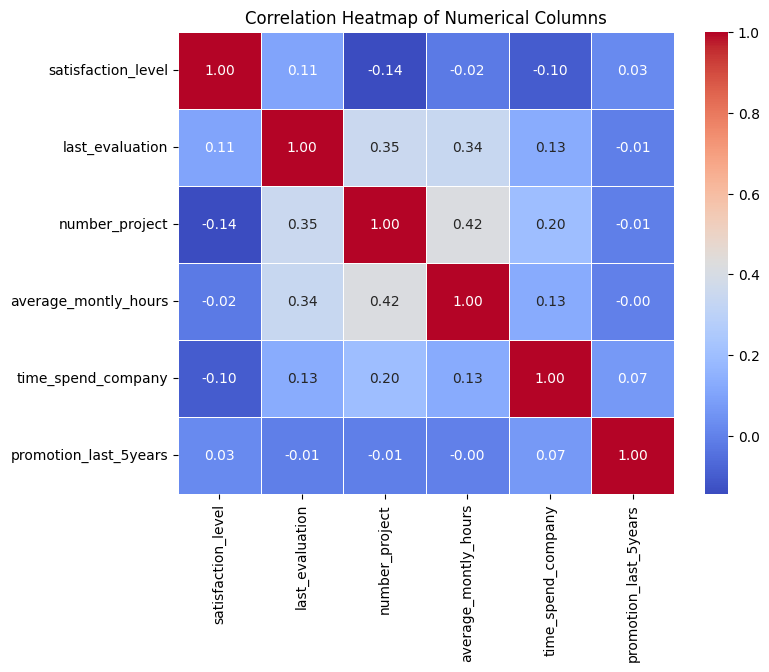

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_2 = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years']]
correlation_matrix = df_2.corr()

correlation_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()





Some key highlights from the heatmap for correlation matrix:

*   Promotion in the last 5 years is weakly correlated to evaluation and no of projects.
*   Evaluation is strongly positively correlated to number of projects and monthly hours.
*   Number of projects is strongly positively correlated to monthly hours and last evaluation.
*   Monthly hours is strongly positively correlated to evaluation and number of projects.
*   Satisfaction is negatively correlated to the no of projects and time spent

It is important to note that I have made some assumptions here: I have taken any correlation greater than >0.3 to be strongly correlated. Any correlation between -0.01 to 0 and 0 to 0.01 to show no correlation.

#Distribution Plot for Employee Satisfaction

*   We can see that more than 800 employees feel no satisfaction and nearly only around 600 are completely satisfied.




Text(0.5, 1.0, 'Employee Satisfaction Distribution')

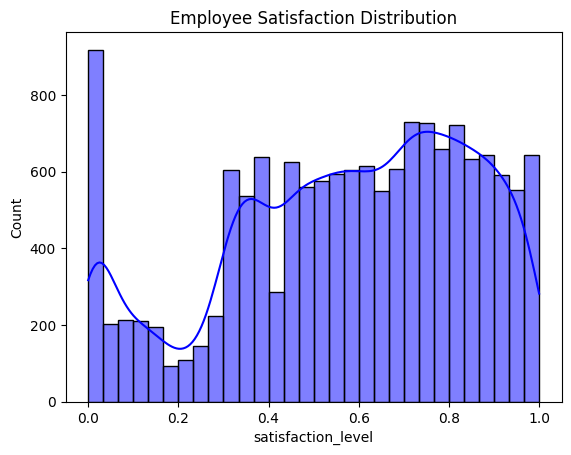

In [ ]:
plt.subplot(1, 1, 1)
sns.histplot(df['satisfaction_level'], kde=True, color='blue')
plt.title('Employee Satisfaction Distribution')

0.2 to 0.3 was the most evaluation scores given to employees. Less than 200
employees received an evaluation of 0.

Text(0.5, 1.0, 'Employee Evaluation Distribution')

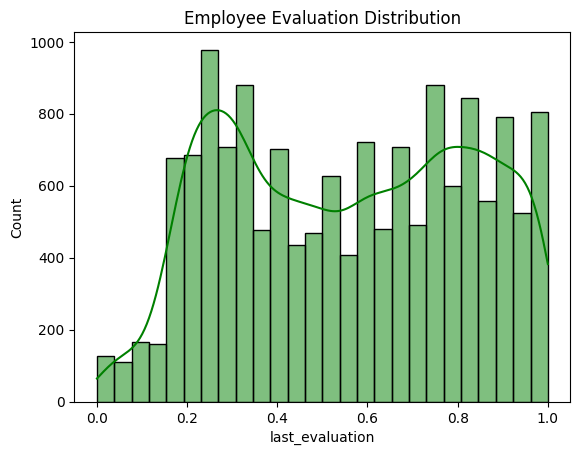

In [ ]:
plt.subplot(1, 1, 1)
sns.histplot(df['last_evaluation'], kde=True, color='green')
plt.title('Employee Evaluation Distribution')

Most employees worked between 0.2 to 0.8 of average monthly hours.

Text(0.5, 1.0, 'Average Monthly Hours Distribution')

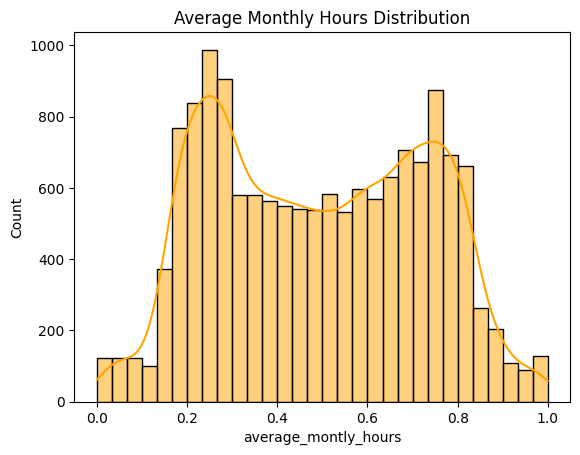

In [ ]:
plt.subplot(1, 1, 1)
sns.histplot(df['average_montly_hours'], kde=True, color='orange')
plt.title('Average Monthly Hours Distribution')


Bar plot showing average number of projects for employees that left and that stayed.

*   From the chart below, we can see that the employees who left did a higher number of projects than the employees that stayed.




<ipython-input-19-d806c0703921>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='left', y='number_project', data=average_projects, palette='Set1')


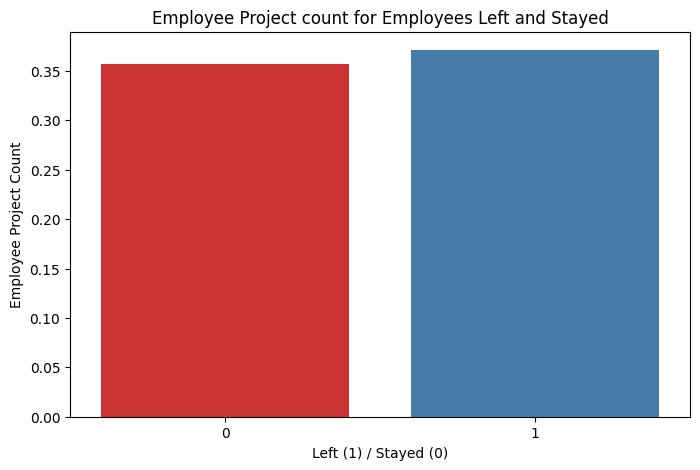

In [ ]:
average_projects = df.groupby('left')['number_project'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='left', y='number_project', data=average_projects, palette='Set1')
plt.title('Employee Project count for Employees Left and Stayed')
plt.xlabel('Left (1) / Stayed (0)')
plt.ylabel('Employee Project Count')
plt.show()

#K-Means Clusterring of employees that left based on the Evaluation and Satisfaction levels.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


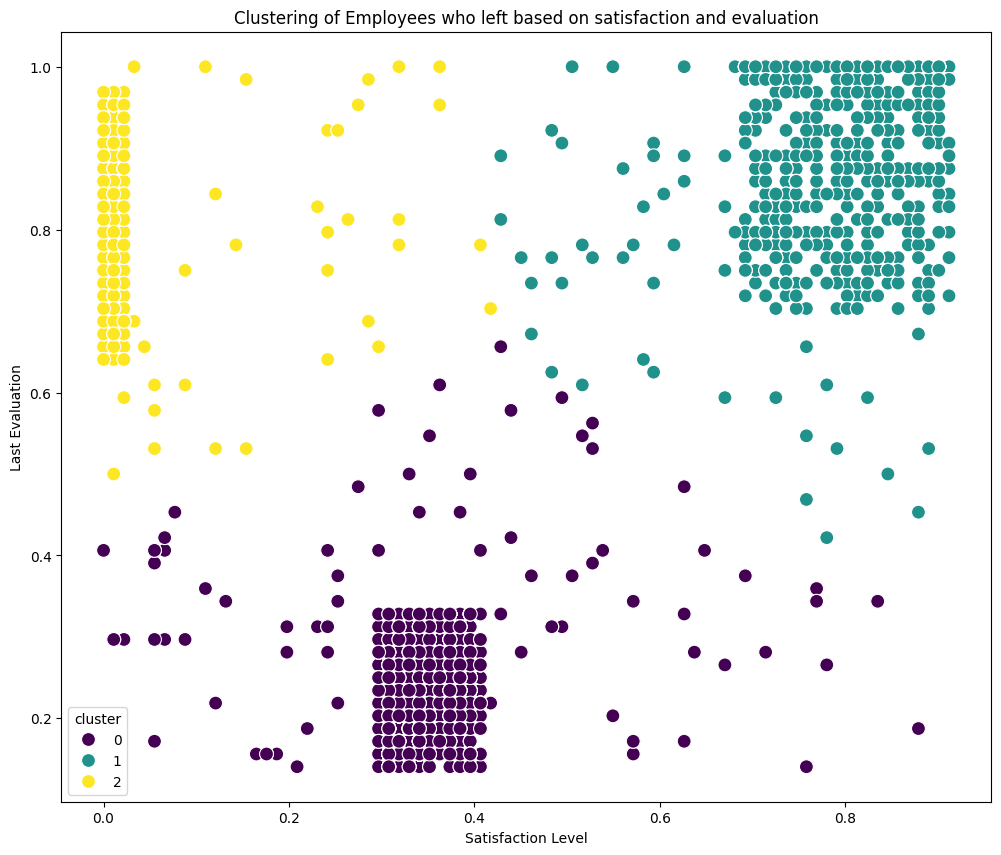

       satisfaction_level  last_evaluation  cluster
0                0.318681         0.265625        0
1                0.780220         0.781250        1
2                0.021978         0.812500        2
3                0.692308         0.796875        1
4                0.307692         0.250000        0
...                   ...              ...      ...
14994            0.340659         0.328125        0
14995            0.307692         0.187500        0
14996            0.307692         0.265625        0
14997            0.021978         0.937500        2
14998            0.307692         0.250000        0

[3571 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction_level  3571 non-null   float64
 1   last_evaluation     3571 non-null   float64
 2   cluster             3571 non-null   int32  

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
left_data = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]
left_data['cluster'] = kmeans.fit_predict(left_data[['satisfaction_level', 'last_evaluation']])

plt.figure(figsize=(12, 10))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_data, palette='viridis', s=100)
plt.title('Clustering of Employees who left based on satisfaction and evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

print (left_data)
left_data.info()
print(left_data['cluster'].value_counts())

Remarks: Based on the 3 clusters formed, it looks like more than 50% (1670/3571) of the past employees had a evaluation rate of less than 0.6 and a satisfaction rate between 0.3 to 0.4.

Almost 27% (965/3571) of the past employees got a high evaluation and were also highly satisfied at their work place.

Almost 26% (936/3571) of the past employees got a high evaluation but were not satisfied with their workplace.


The clusters can be described as follows:

Cluster 0: Not performing well and modetarely satisfied
Cluster 1: High performing and highly satisfied
Cluster 2: High performing and not satisfied



#Separating the numerical and categorical variables

I have 6 numerical and 4 categorical columns, since some categorical variables, such as left and work accidents have data types integer, I will manually alter my dataframe into two, one with numerical and 1 with categorical.


In [ ]:
numerical_columns = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years']]
categorical_columns = df[['left','Work_accident','sales','salary']]

print(categorical_columns)

print(numerical_columns)



       left  Work_accident    sales  salary
0         1              0    sales     low
1         1              0    sales  medium
2         1              0    sales  medium
3         1              0    sales     low
4         1              0    sales     low
...     ...            ...      ...     ...
14994     1              0  support     low
14995     1              0  support     low
14996     1              0  support     low
14997     1              0  support     low
14998     1              0  support     low

[14999 rows x 4 columns]
       satisfaction_level  last_evaluation  number_project  \
0                0.318681         0.265625             0.0   
1                0.780220         0.781250             0.6   
2                0.021978         0.812500             1.0   
3                0.692308         0.796875             0.6   
4                0.307692         0.250000             0.0   
...                   ...              ...             ...   
14994       

Applying the get_dummies() function to the categorical variables from the categorical_columns dataframe.

In [ ]:
categorical_columns_encoded = pd.get_dummies(categorical_columns, columns=['sales', 'salary'])

print(categorical_columns_encoded)

       left  Work_accident  sales_IT  sales_RandD  sales_accounting  sales_hr  \
0         1              0         0            0                 0         0   
1         1              0         0            0                 0         0   
2         1              0         0            0                 0         0   
3         1              0         0            0                 0         0   
4         1              0         0            0                 0         0   
...     ...            ...       ...          ...               ...       ...   
14994     1              0         0            0                 0         0   
14995     1              0         0            0                 0         0   
14996     1              0         0            0                 0         0   
14997     1              0         0            0                 0         0   
14998     1              0         0            0                 0         0   

       sales_management  sa

# Dropping the original categorical columns and replacing them with the new categorical columns

df_2 being the new dataframe I am working with.

In [ ]:
df_dropped = df.drop(columns=['left','Work_accident','sales','salary'])

df_2 = pd.concat([numerical_columns, categorical_columns_encoded], axis=1)

df_2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,left,Work_accident,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


#Splitting the data set (df_2) into train and test data


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_2.drop(columns=['left'])
Y = y = df_2['left']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11999, 20)
(3000, 20)
(11999,)
(3000,)


#Applying the SMOTE technique

We actually see that the record counts have increased after the SMOTE to even the distribution of the minority class in the target variable 'left'

In [ ]:
smote = SMOTE(random_state=123)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print(X_train_smote.shape)
print(Y_train_smote.shape)

(18274, 20)
(18274,)


#Logistic Regression

Apply 5-fold cross validation to test the performance of the logistic regression model on un-seen data.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, classification_report, roc_curve, roc_auc_score, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict


logistic_model = LogisticRegression()
logistic_model.fit(X_train_smote, Y_train_smote)
logistic_model_pred = logistic_model.predict(X_train_smote)
print(mean_absolute_error(logistic_model_pred, Y_train_smote))


y_pred = cross_val_predict(logistic_model, X_train_smote, Y_train_smote, cv=5)

report = classification_report(Y_train_smote, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
df_report = pd.DataFrame(report)

print(df_report)



0.22261136040275803
               Class 0      Class 1  accuracy     macro avg  weighted avg
precision     0.792837     0.763489  0.777389      0.778163      0.778163
recall        0.751012     0.803765  0.777389      0.777389      0.777389
f1-score      0.771358     0.783109  0.777389      0.777234      0.777234
support    9137.000000  9137.000000  0.777389  18274.000000  18274.000000


# RandomForestClassifier

Apply 5-fold cross validation to test the performance of the random forest model on un-seen data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train_smote, Y_train_smote)

rf_model_pred = rf_model.predict(X_train_smote)
print(mean_absolute_error(rf_model_pred, Y_train_smote))


y_pred_rf = cross_val_predict(rf_model, X_train_smote, Y_train_smote, cv=5)

report_rf = classification_report(Y_train_smote, y_pred_rf, target_names=['Class 0', 'Class 1'], output_dict=True)
df_report_rf = pd.DataFrame(report_rf)

print(df_report_rf)


0.0
               Class 0      Class 1  accuracy     macro avg  weighted avg
precision     0.979856     0.995440  0.987523      0.987648      0.987648
recall        0.995513     0.979534  0.987523      0.987523      0.987523
f1-score      0.987622     0.987423  0.987523      0.987522      0.987522
support    9137.000000  9137.000000  0.987523  18274.000000  18274.000000


#Gradient Boosting Classifier

Apply 5-fold cross validation to test the performance of the Gradient Boosting Classifier model on un-seen data.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=132)

gb_classifier.fit(X_train_smote, Y_train_smote)

y_pred_gb_classifier = cross_val_predict(gb_classifier, X_train_smote, Y_train_smote, cv=5)

report_gb = classification_report(Y_train_smote, y_pred_gb_classifier, target_names=['Class 0', 'Class 1'], output_dict=True)
df_report_gb = pd.DataFrame(report_gb)

print(df_report_gb)




               Class 0      Class 1  accuracy     macro avg  weighted avg
precision     0.957454     0.977301  0.967166      0.967377      0.967377
recall        0.977783     0.956550  0.967166      0.967166      0.967166
f1-score      0.967511     0.966814  0.967166      0.967163      0.967163
support    9137.000000  9137.000000  0.967166  18274.000000  18274.000000


Analysis:

Our model is trained with 5-fold cross validation. Since we are looking at model performance, we can use the F1 score from the classification report to make a hypothesis on which model will perform the best. Since the F1-score (0.987522) of the Random Forest Classifier is the highest, we can assume that this model is the most effective at predicting employee turnover while keeping false predictions relatively low.

We still need to test the models on the test data and get their accuracy scores.




#ROC/AUC for Logistic Regression Model

[0.09877593 0.11643179 0.11145014 ... 0.49575545 0.39700746 0.37981768]


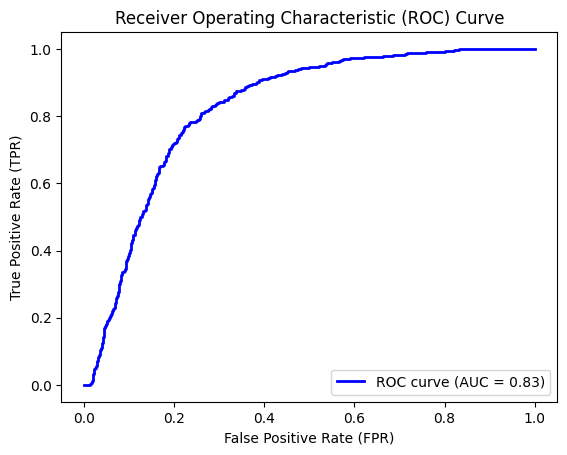

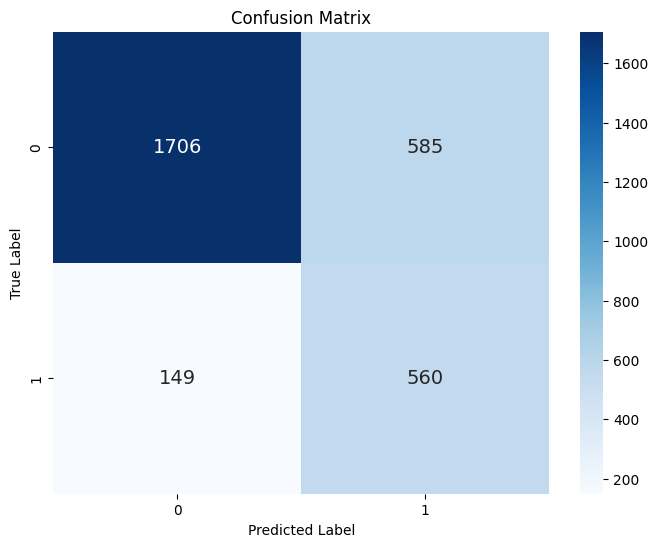

               Class 0     Class 1  accuracy    macro avg  weighted avg
precision     0.919677    0.489083  0.755333     0.704380      0.817913
recall        0.744653    0.789845  0.755333     0.767249      0.755333
f1-score      0.822962    0.604099  0.755333     0.713531      0.771237
support    2291.000000  709.000000  0.755333  3000.000000   3000.000000


In [ ]:
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

print(y_pred_proba)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

y_pred_lm = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred_lm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report_lm = classification_report(Y_test, y_pred_lm, target_names=['Class 0', 'Class 1'], output_dict=True)
print(pd.DataFrame(report_lm))



#AUC/ROC with RandomForest Classifier

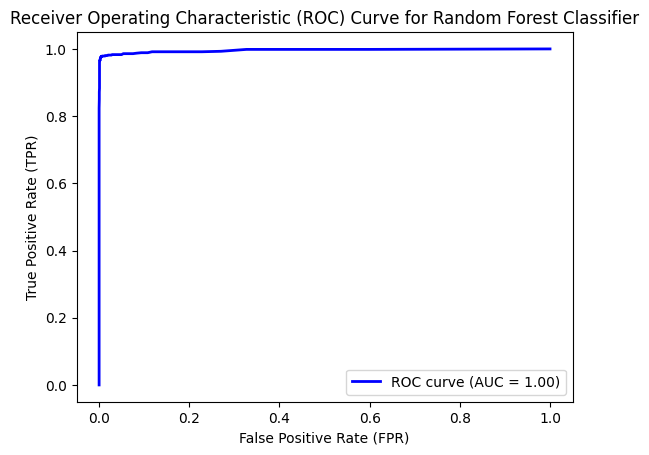

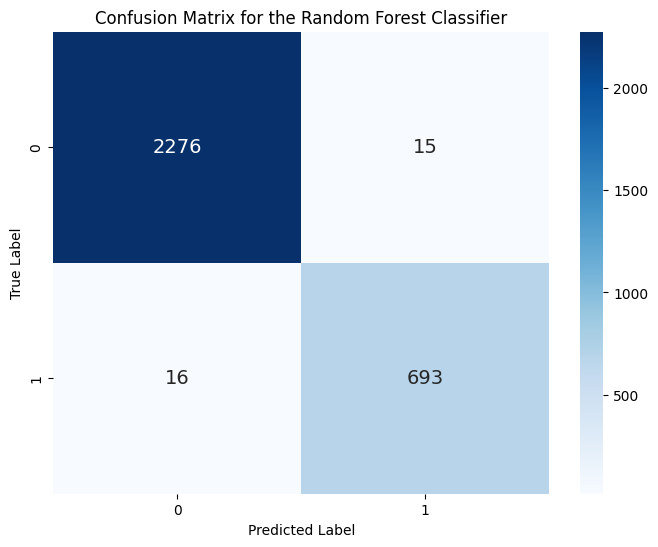

               Class 0     Class 1  accuracy    macro avg  weighted avg
precision     0.993019    0.978814  0.989667     0.985916      0.989662
recall        0.993453    0.977433  0.989667     0.985443      0.989667
f1-score      0.993236    0.978123  0.989667     0.985679      0.989664
support    2291.000000  709.000000  0.989667  3000.000000   3000.000000


In [ ]:
y_pred_probarf = rf_model.predict_proba(X_test)[:, 1]

fpr1, tpr1, thresholds1 = roc_curve(Y_test, y_pred_probarf)

roc_auc2 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc2:.2f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='lower right')

y_pred_rf2 = rf_model.predict(X_test)
conf_matrix2 = confusion_matrix(Y_test, y_pred_rf2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 14})
plt.title('Confusion Matrix for the Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report_lm2 = classification_report(Y_test, y_pred_rf2, target_names=['Class 0', 'Class 1'], output_dict=True)
print(pd.DataFrame(report_lm2))


#AUC/ROC with Gradient Boosting

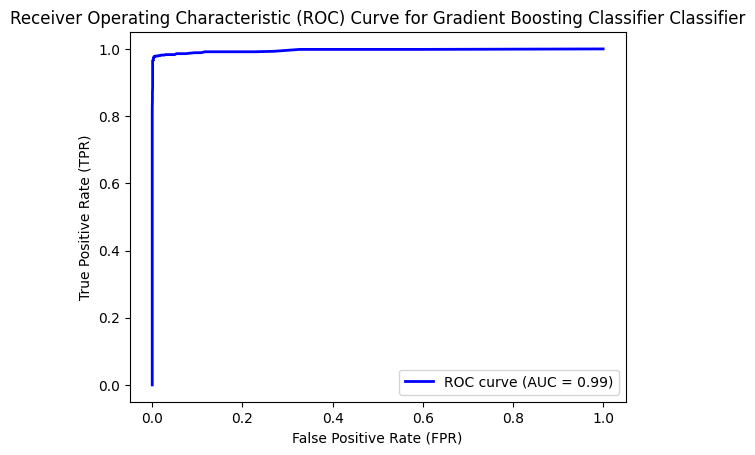

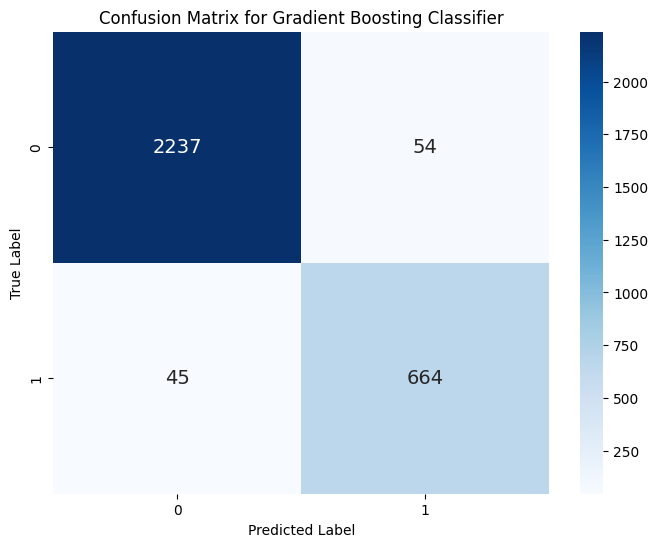

               Class 0     Class 1  accuracy    macro avg  weighted avg
precision     0.980280    0.924791     0.967     0.952536      0.967166
recall        0.976430    0.936530     0.967     0.956480      0.967000
f1-score      0.978351    0.930624     0.967     0.954487      0.967072
support    2291.000000  709.000000     0.967  3000.000000   3000.000000


In [ ]:
y_pred_probagb = gb_classifier.predict_proba(X_test)[:, 1]

fpr2, tpr2, thresholds1 = roc_curve(Y_test, y_pred_probagb)

roc_auc3 = auc(fpr2, tpr2)

plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc3:.2f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting Classifier Classifier')
plt.legend(loc='lower right')

y_pred_gb2 = gb_classifier.predict(X_test)
conf_matrix3 = confusion_matrix(Y_test, y_pred_gb2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 14})
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report_gb3 = classification_report(Y_test, y_pred_gb2, target_names=['Class 0', 'Class 1'], output_dict=True)
print(pd.DataFrame(report_gb3))




#Best Model:

False positive: The Model predicts that an employee is leaving but employee stays
False Negative: The Model predicts that employee stays but employee is leaving

Higher rates of false positives can cause management to overcompensate employees to stay, even though they never intended to leave. Higher rates of false negative rates can cause understaffing issues.

Since neither false positives nor false negatives can be weighed above each other, I will be using the F1-score. F1-score will be the best metric to use to choose the best model, the model chosen based on the F-1 score is Random Forest Classifier.

#Predicting Employee Turnover using the Random Forest Classifier

In [ ]:
Y_Test_Predict = rf_model.predict_proba(X_test)

df_probabilities = pd.DataFrame(Y_Test_Predict)

print(df_probabilities)

         0     1
0     1.00  0.00
1     0.99  0.01
2     1.00  0.00
3     0.80  0.20
4     0.99  0.01
...    ...   ...
2995  0.01  0.99
2996  0.99  0.01
2997  0.00  1.00
2998  1.00  0.00
2999  1.00  0.00

[3000 rows x 2 columns]


Since we are looking at employee turnover, we have to get probabilities of class 1.

In [ ]:
df_6 = pd.DataFrame(df_probabilities.iloc[:, -1])
print(df_6)
df_6.info()


         1
0     0.00
1     0.01
2     0.00
3     0.20
4     0.01
...    ...
2995  0.99
2996  0.01
2997  1.00
2998  0.00
2999  0.00

[3000 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       3000 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


    Probability  Frequency
0          0.00        921
2          0.01        401
3          0.02        221
4          0.03        134
5          0.04         98
..          ...        ...
21         0.96         15
17         0.97         20
12         0.98         32
7          0.99         59
1          1.00        493

[83 rows x 2 columns]


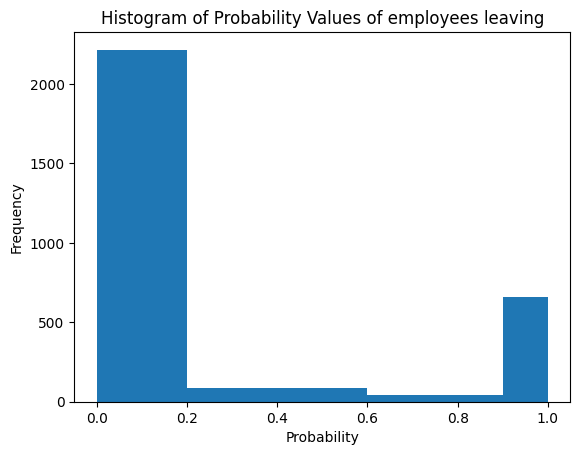

In [ ]:
bins = bins = [0, 0.2, 0.6, 0.9, 1]
bin_colors = ['green', 'yellow', 'orange', 'red']
plt.hist(df_6[df_6.columns[-1]], bins=bins)

plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probability Values of employees leaving')

frequency_table = df_6[df_6.columns[-1]].value_counts().reset_index()
frequency_table.columns = ['Probability', 'Frequency']

frequency_table = frequency_table.sort_values(by='Probability')

print(frequency_table)




Very few employees have a high probability of leaving. These employees with probability greater than 60% are in the medium to high risk zone of leaving.

Some retention strategies could be:

*   Higher compensations.
*   Honest conversations with employees to better understand what they are looking for in their job.
*   More work socials to induce a sense of belonging for employees.




